In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.optimizers import SGD
from scipy.integrate import quad, nquad

## Set hyperparameters

In [18]:
dim = 1

input_dim = dim
hidden_dim = 4 * input_dim
output_dim = 1

activation_func = "relu"

## Implement loss function

In [19]:
lam = 1.0  # Tbc
rho = 1.0  # Tbc

def h_i(x, i):
    return x ** 2  # Tbc

def g(x):
    return x ** 2  # tbc

def mu_i_density(x, i):
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)  # tbc

def sample_mu(n_samples, dim):
    return np.random.randn(n_samples, dim)  # tbc


def phi_theta_gamma(samples):
    h_integral =  np.sum([np.mean([h_i(sample[i], i) for sample in samples]) for i in range(dim)])
    g_integral = np.mean([g(sample) for sample in samples])

    # TODO
    theta_integral = 0

    return lam * rho + h_integral + g_integral + theta_integral

def loss_function(x_true, x_pred):
    return tf.reduce_mean((x_pred - np.sqrt(2)) ** 2)


## Create model

In [20]:
initilizer = RandomNormal(mean=0.0, stddev=1.0)

model = Sequential()
model.add(Input(shape=(input_dim,)))
model.add(Dense(units=hidden_dim, activation=activation_func, kernel_initializer=initilizer))
model.add(Dense(units=hidden_dim, activation=activation_func, kernel_initializer=initilizer))
model.add(Dense(units=hidden_dim, activation=activation_func, kernel_initializer=initilizer))
model.add(Dense(units=output_dim, kernel_initializer=initilizer))

In [21]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000, decay_rate=0.9
)

opt = keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=opt, loss=loss_function)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 4)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53 (212.00 B)

 Trainable params: 53 (212.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
n_samples = 10 ** 4
x_samples = sample_mu(n_samples, dim)
x_true_irrelevant = np.zeros_like(x_samples)

model.fit(x_samples, x_true_irrelevant, epochs=20, batch_size=32)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 850us/step - loss: 1.4271
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 0.0015
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - loss: 9.3388e-04
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 4.5773e-04
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 1.2672e-04
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 9.0791e-05
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 8.4025e-05
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - loss: 1.3825e-05
Epoch 9/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - loss: 1.1761e-05
Epoch 10/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6284e-05 
Epoch 11/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 5.8544e-06
Epoch 12/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 1.5233e-05
Epoch 13/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - loss: 1.6066e-04
Epoch 14/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step -

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[[1.414    ]
 [1.4142034]
 [1.4137664]
 [1.4159873]
 [1.4139767]
 [1.414314 ]
 [1.4140868]
 [1.4138379]
 [1.4142439]
 [1.4141002]
 [1.4143882]
 [1.4142163]
 [1.4141066]
 [1.413837 ]
 [1.414211 ]
 [1.4152243]
 [1.4140122]
 [1.4143608]
 [1.4143786]
 [1.4151828]
 [1.4165175]
 [1.413625 ]
 [1.415375 ]
 [1.414134 ]
 [1.4142118]
 [1.4141569]
 [1.4139433]
 [1.4139194]
 [1.4152977]
 [1.4139574]
 [1.4144013]
 [1.4513991]
 [1.4145741]
 [1.4142346]
 [1.4137566]
 [1.4139485]
 [1.4138842]
 [1.4137485]
 [1.4143443]
 [1.4141302]
 [1.4138699]
 [1.4141705]
 [1.4141612]
 [1.4139621]
 [1.4139707]
 [1.414103 ]
 [1.4140077]
 [1.4165063]
 [1.4139304]
 [1.4141788]
 [1.4139462]
 [1.4138803]
 [1.4138258]
 [1.4137764]
 [1.4141369]
 [1.4138827]
 [1.4143324]
 [1.4139524]
 [1.4144039]
 [1.4143176]
 [1.4161448]
 [1.4141245]
 [1.4137294]
 [1.4143441]
 [1.4138935]
 [1.413985 ]
 [1.4161117]
 [1.4137793]
 [1.4140217]
 [1.4160378]
 [1.4161289]
 [1.4138739]
 [1.4141176]
 [1.414309 ]


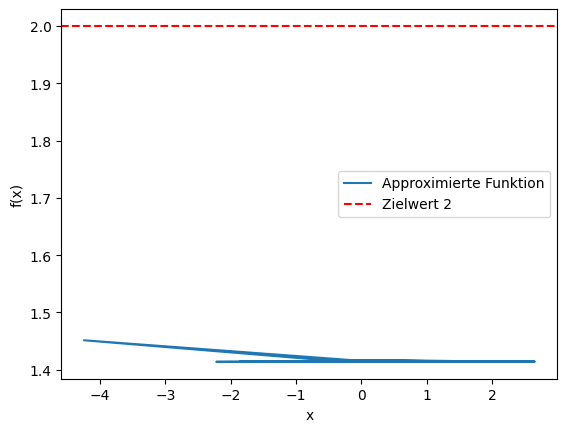

In [23]:
x_test = sample_mu(100, dim)
y_test = model.predict(x_test)

print(y_test)

plt.plot(x_test, y_test, label='Approximierte Funktion')
plt.axhline(2, color='r', linestyle='--', label='Zielwert 2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

# Not needed

In [24]:
""" import numpy as np
from scipy.optimize import minimize
from scipy.integrate import quad, nquad

# Beispiel für \rho
rho = 1.0  # Anpassen je nach Definition
lambda_val = 1.0

#Dummy-Beispiel für h_i und g. Muss später per NN optimiert werden (?).
def h_i(x, i):
    return x**2

def g(x):
    return sum(x)

# Beispiel für \beta_{\gamma} Funktion
def beta_gamma(z, gamma):
    # Dummy-Beispiel für die Funktion, anpassen je nach Definition
    return np.exp(-gamma * z**2)

# Dummy-Funktion für Verteilungen \bar{\mu}_i und \bar{\mu}
def mu_i_density(y, i):
    # Dummy-Dichtefunktion, anpassen je nach Definition
    return np.exp(-y**2 / 2) / np.sqrt(2 * np.pi)

def mu_density(x):
    # Dummy-Dichtefunktion, anpassen je nach Definition
    return np.exp(-np.sum(x**2) / 2) / (2 * np.pi)**(len(x)/2)

# Kostenfunktion c(x, y)
def cost_function(x, y):
    # Beispiel-Kostenfunktion, anpassen je nach Definition
    return np.linalg.norm(x - y)

# Funktion \phi_{\theta,\gamma}(f)
def phi_theta_gamma(f, theta, gamma, d):

    # Integrale berechnen
    h_integral = sum(quad(lambda y: h_i(y, i) * mu_i_density(y, i), -np.inf, np.inf)[0] for i in range(d))
    g_integral = nquad(lambda *x: g(x) * mu_density(np.array(x)), [(-np.inf, np.inf)] * d)[0]

    def integrand(x, y):
            return beta_gamma(f(y) - sum(h_i(y[0], i) for i in range(d)) - lambda_val * cost_function(x, y) - g, gamma) * theta(x, y)

    beta_integral = nquad(integrand, [(-np.inf, np.inf)] * (2*d))

    return lambda_val * rho + h_integral + g_integral + beta_integral


    # # Initiale Parameter
    # initial_params = np.zeros(d + 1 + d)
    
    # # Optimierung
    # result = minimize(objective, initial_params, method='SLSQP')
    
    # return result.fun


# Beispielaufruf der Funktion
if __name__ == "__main__":
    # Dummy \theta Funktion
    def theta(x, y):
        return 1.0  # Dummy-Wert, anpassen je nach Definition

    # Dummy f Funktion
    def f(y):
        return np.sum(y**2)  # Dummy-Wert, anpassen je nach Definition

    # Parameter
    gamma = 1.0
    d = 1  # Dimension

    # Funktionsaufruf
    result = phi_theta_gamma(f, theta, gamma, d)
    print(f'Result: {result}')
 """

<>:1: SyntaxWarning: invalid escape sequence '\g'
<>:1: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_173452/800979208.py:1: SyntaxWarning: invalid escape sequence '\g'
  """ import numpy as np


' import numpy as np\nfrom scipy.optimize import minimize\nfrom scipy.integrate import quad, nquad\n\n# Beispiel für \rho\nrho = 1.0  # Anpassen je nach Definition\nlambda_val = 1.0\n\n#Dummy-Beispiel für h_i und g. Muss später per NN optimiert werden (?).\ndef h_i(x, i):\n    return x**2\n\ndef g(x):\n    return sum(x)\n\n# Beispiel für \x08eta_{\\gamma} Funktion\ndef beta_gamma(z, gamma):\n    # Dummy-Beispiel für die Funktion, anpassen je nach Definition\n    return np.exp(-gamma * z**2)\n\n# Dummy-Funktion für Verteilungen \x08ar{\\mu}_i und \x08ar{\\mu}\ndef mu_i_density(y, i):\n    # Dummy-Dichtefunktion, anpassen je nach Definition\n    return np.exp(-y**2 / 2) / np.sqrt(2 * np.pi)\n\ndef mu_density(x):\n    # Dummy-Dichtefunktion, anpassen je nach Definition\n    return np.exp(-np.sum(x**2) / 2) / (2 * np.pi)**(len(x)/2)\n\n# Kostenfunktion c(x, y)\ndef cost_function(x, y):\n    # Beispiel-Kostenfunktion, anpassen je nach Definition\n    return np.linalg.norm(x - y)\n\n# Funkti

Epoch 1/50


/home/julian/anaconda3/envs/MLstoch/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step - loss: 1.5520 
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 0.0180
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 6.7702e-04
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 6.3697e-05
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 9.1142e-06
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 3.0957e-06
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 1.7440e-06
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 1.9970e-06
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - loss: 3.1800e-06
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - loss: 1.4699e-06
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 1.0876e-06
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 1.8486e-06
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - loss: 1.8363e-06
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 8.1449e-07
Epoch 15/50
32/32 ━

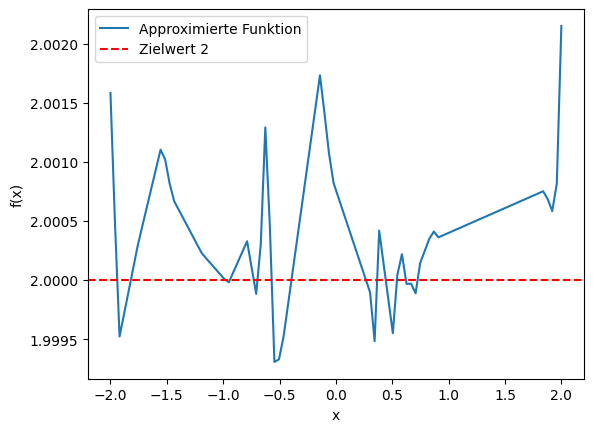

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Beispiel-Optimierungsproblem: Minimierung von (x - 2)^2
# Ziel ist es, eine Funktion f(x) zu approximieren, die dieses Problem minimiert.

# Erstellen Sie einige Beispiel-Daten (unüberwachtes Lernen)
x_train = np.random.rand(1000, 1) * 4 - 2  # Werte zwischen -2 und 2

# Definieren Sie die Struktur des neuronalen Netzes
model2 = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Definieren Sie die benutzerdefinierte Verlustfunktion
def custom_loss(y_true, y_pred):
    return tf.reduce_mean((y_pred - 2) ** 2)  # Beispiel: (f(x) - 2)^2

# Kompilieren Sie das Modell mit der benutzerdefinierten Verlustfunktion
model2.compile(optimizer=Adam(learning_rate=0.01), loss=custom_loss)

# Da es sich um unüberwachtes Lernen handelt, können wir Dummy-Zielwerte verwenden (werden nicht wirklich verwendet)
y_dummy = np.zeros_like(x_train)

# Trainieren Sie das Modell
model2.fit(x_train, y_dummy, epochs=50, batch_size=32)

# Testen Sie das Modell
x_test = np.linspace(-2, 2, 100).reshape(-1, 1)
y_pred = model2.predict(x_test)

import matplotlib.pyplot as plt

plt.plot(x_test, y_pred, label='Approximierte Funktion')
plt.axhline(2, color='r', linestyle='--', label='Zielwert 2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()
